In [6]:
import json
from io import StringIO
from popframe.method.landuse_assessment import LandUseAssessment
from popframe.models.region import Region
import geopandas as gpd
from loguru import logger

region_model = Region.from_pickle('data/Ленинградская область.pickle')
grid = gpd.read_file('data/gdf_hex.geojson', engine="pyogrio")
grid

,id,geometry
0,0,"POLYGON ((33.91559 59.82096, 33.95148 59.79578..."
1,1,"POLYGON ((28.20662 59.1581, 28.2438 59.13497, ..."
2,2,"POLYGON ((33.24922 59.58248, 33.28514 59.55749..."
3,3,"POLYGON ((28.57012 59.80949, 28.60788 59.78638..."
4,4,"POLYGON ((30.09734 59.44654, 30.13424 59.42273..."
...,...,...
3327,3327,"POLYGON ((28.99968 60.80903, 29.03841 60.786, ..."
3328,3328,"POLYGON ((27.76572 59.6348, 27.80353 59.61197,..."
3329,3329,"POLYGON ((28.07442 59.28143, 28.11177 59.25838..."
3330,3330,"POLYGON ((33.49512 60.06568, 33.53143 60.04072..."


In [8]:
grid.explore()

In [11]:
territory = grid[grid['id'] == 486] # указать id выбранной вами территории

In [12]:
from popframe.method.landuse_assessment import LandUseAssessment

landuse = LandUseAssessment(region=region_model)

landuse_data = landuse.get_landuse_data(territory)
landuse_data

Processing landuse tags: 100%|██████████| 37/37 [01:35<00:00,  2.58s/it]
/Users/mvin/Code/PopFrame/.venv/lib/python3.10/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,№ п/п,Название хранимое,ед.изм.,Значение,Источник,Период,geometry
0,1.3.1,Процент застройки жилищным строительством,%,3.581,modeled,2024,"MULTIPOLYGON (((30.04435 59.70387, 30.04287 59..."
1,1.3.2,Процент земель сельскохозяйственного назначения,%,26.993,modeled,2024,"MULTIPOLYGON (((30.03271 59.70754, 30.03322 59..."
2,1.3.3,Процент земель промышленного назначения,%,6.772,modeled,2024,"MULTIPOLYGON (((30.03711 59.70374, 30.0375 59...."
3,1.3.4,"Процент земель, занятых лесными массивами",%,8.178,modeled,2024,"MULTIPOLYGON (((30.04243 59.69908, 30.04269 59..."
4,1.3.5,Процент земель специального назначения,%,5.046,modeled,2024,"MULTIPOLYGON (((30.0993 59.70379, 30.09865 59...."
5,1.3.6,Процент земель населенных пунктов,%,31.272,modeled,2024,"MULTIPOLYGON (((30.0882 59.71847, 30.08821 59...."
6,1.3.8,"Процент земель, занятых водным фондом",%,0.991,modeled,2024,"MULTIPOLYGON (((30.04366 59.70555, 30.04347 59..."
7,1.3.9,Территории смежного назначения,%,17.163,modeled,2024,"MULTIPOLYGON (((30.0223 59.71255, 30.02295 59...."


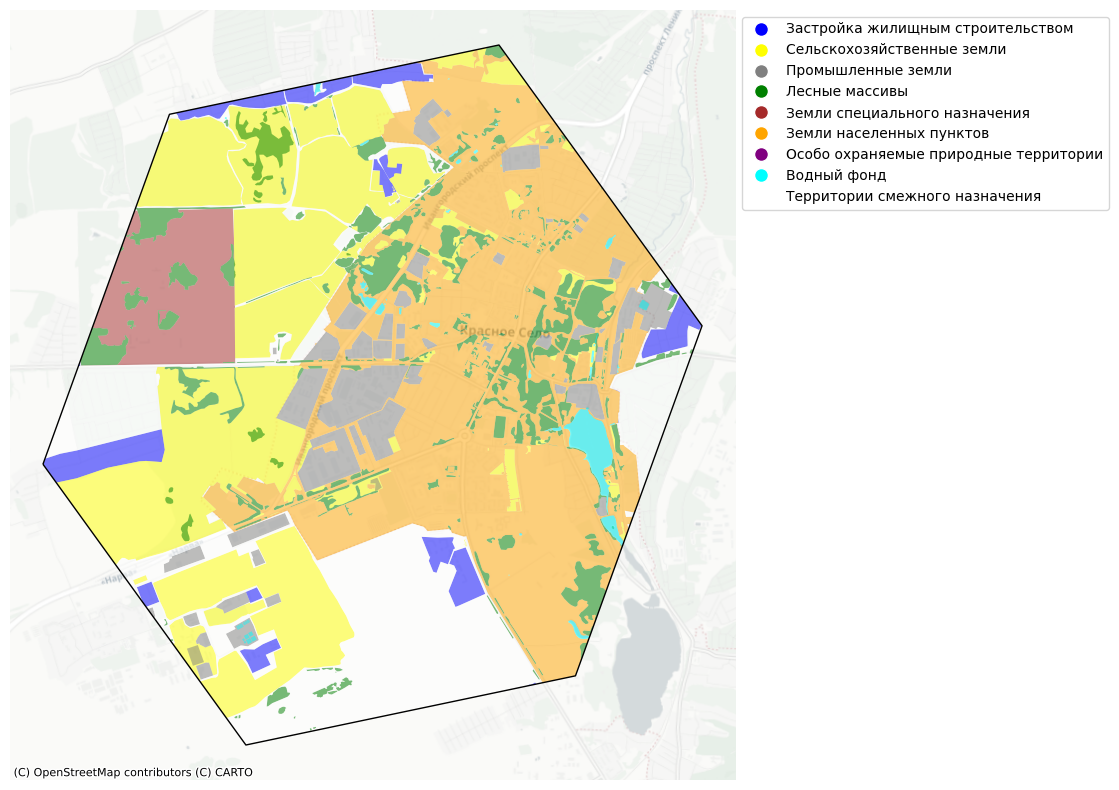

In [13]:
landuse.plot_landuse(territory, landuse_data)